In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns


In [61]:
# load the data
df = pd.read_csv("data.csv")
df.head()

,language,proj_id,file_id,file_body
0,JavaScript,10001,100001,// Functions as values of a variable\nvar cube...
1,JavaScript,10001,100002,// Functions as values of a variable\nvar cube...
2,JavaScript,10002,100003,function median(ary) {\n if (ary.length == ...
3,JavaScript,10002,100004,"[\n null,\n 4,\n 3.5,\n 2.1\n]\n"
4,JavaScript,10002,100005,(() => {\n 'use strict';\n\n // median :...


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16272 entries, 0 to 16271
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   language   16272 non-null  object
 1   proj_id    16272 non-null  int64 
 2   file_id    16272 non-null  int64 
 3   file_body  16268 non-null  object
dtypes: int64(2), object(2)
memory usage: 508.6+ KB


In [63]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.head()

,index,language,proj_id,file_id,file_body
0,0,JavaScript,10001,100001,// Functions as values of a variable\nvar cube...
1,1,JavaScript,10001,100002,// Functions as values of a variable\nvar cube...
2,2,JavaScript,10002,100003,function median(ary) {\n if (ary.length == ...
3,3,JavaScript,10002,100004,"[\n null,\n 4,\n 3.5,\n 2.1\n]\n"
4,4,JavaScript,10002,100005,(() => {\n 'use strict';\n\n // median :...


In [78]:
print(df['language'].unique())

['JavaScript' 'Swift' 'Python' 'Java' 'C++' 'Ruby' 'Rust' 'C' 'Scala' 'R'
 'Go' 'Mathematica' 'Kotlin' 'Fortran' 'Julia' 'PHP' 'MATLAB' 'Haskell'
 'Perl']


In [34]:
df['language'].value_counts().sort_values(ascending=False)

Python         1452
Haskell        1333
Perl           1135
Ruby           1104
JavaScript     1104
C              1078
Go              998
Java            987
Mathematica     926
C++             880
Scala           802
Fortran         745
Kotlin          643
Julia           637
R               603
MATLAB          544
PHP             477
Rust            417
Swift           403
Name: language, dtype: int64

In [76]:
# Distribution of languages
plt.figure(figsize=(10, 15))
px.bar(x=df['language'].value_counts(ascending=True).values, y=df['language'].value_counts(ascending=True).index, orientation='h', template='ggplot2', title='Count of samples for each language', height=500, width=800, labels={'x': 'Count', 'y': 'Language'})

<Figure size 720x1080 with 0 Axes>

In [77]:
# get number of strings in each file body
strings = []
for i in range(len(df['file_body'])):
    strings.append(len(df['file_body'][i]))

# turn the list into a Pandas Series to concat it with main df
str_series = pd.Series(strings)

df2 = pd.concat([df, str_series], axis=1, ignore_index=True)
df2.drop(columns=[0, 2, 3], inplace=True)
df2.rename(columns={1: "language", 4: "file_body", 5: "file_len"}, inplace=True)
df2.to_csv("new.csv")
df2.head()

,language,file_body,file_len
0,JavaScript,// Functions as values of a variable\nvar cube...,411
1,JavaScript,// Functions as values of a variable\nvar cube...,493
2,JavaScript,function median(ary) {\n if (ary.length == ...,400
3,JavaScript,"[\n null,\n 4,\n 3.5,\n 2.1\n]\n",30
4,JavaScript,(() => {\n 'use strict';\n\n // median :...,1346


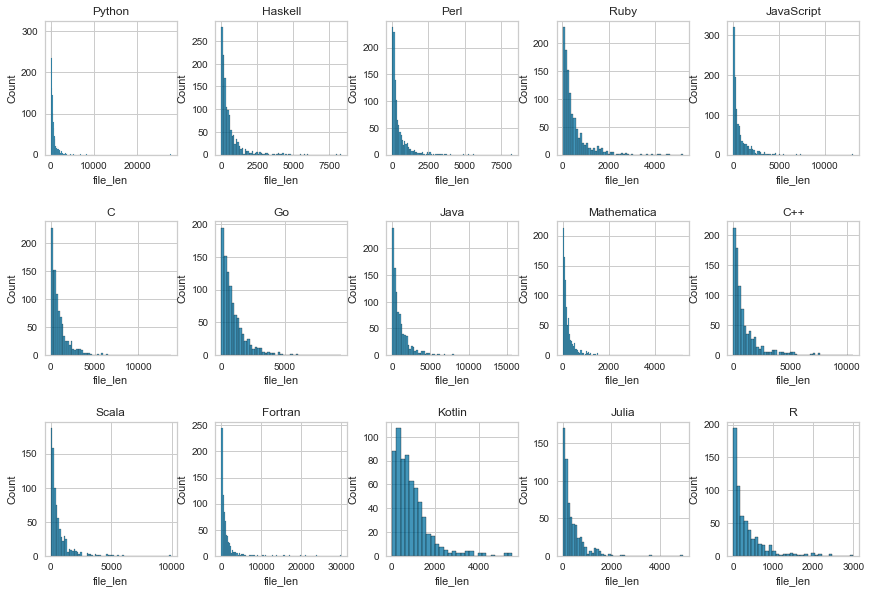

In [85]:
df_size_count = df2.groupby('language').count().sort_values(by='file_len')


fig, axes = plt.subplots(3, 5, figsize=(12, 8))
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
langs = list(df_size_count.index)[::-1]

for i, lang in enumerate(langs):
    if i >= axes.shape[0] * axes.shape[1]: break
    r, c = i // 5, i % 5
    axes[r][c].set_title(lang)
    sns.histplot(df2[df2.language == lang]['file_len'].apply(np.log1p), ax=axes[r][c], palette="summer")

plt.show()

In [75]:
# Plot the mean of number of strings per language
px.bar(x=df2.groupby('language')['file_len'].mean().index, y=df2.groupby('language')['file_len'].mean().values, template='ggplot2', height=500, width=800, title='Mean of number of strings in samples per language', labels={'x': 'Language', 'y': 'Mean of number of strings'})